In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("dfinal.csv", delimiter=",")
df.head()

,Unnamed: 0,Name,Index,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,User_Score,User_Count,Rating
0,0,Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,Nintendo,8,322.0,E
1,2,Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Nintendo,8.3,138.0,E
2,4,Super Mario Bros.,2,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Nintendo,8.3,138.0,E
3,6,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,Nintendo,8.3,709.0,E
4,8,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,Nintendo,8,192.0,E


In [2]:
print(df.info())
print("---------------------------")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    16730 non-null  int64  
 1   Name          16730 non-null  object 
 2   Index         16730 non-null  int64  
 3   Platform      16682 non-null  object 
 4   Year          16541 non-null  float64
 5   Genre         16730 non-null  object 
 6   Publisher     16676 non-null  object 
 7   NA_Sales      16730 non-null  float64
 8   EU_Sales      16730 non-null  float64
 9   JP_Sales      16730 non-null  float64
 10  Other_Sales   16730 non-null  float64
 11  Global_Sales  16730 non-null  float64
 12  Critic_Score  8448 non-null   float64
 13  Critic_Count  8448 non-null   float64
 14  Developer     10825 non-null  object 
 15  User_Score    10698 non-null  object 
 16  User_Count    8729 non-null   float64
 17  Rating        10688 non-null  object 
dtypes: float64(9), int64(2), o

# Nettoyage



In [3]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head()

,Name,Index,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,User_Score,User_Count,Rating
0,Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,Nintendo,8,322.0,E
1,Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Nintendo,8.3,138.0,E
2,Super Mario Bros.,2,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Nintendo,8.3,138.0,E
3,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,Nintendo,8.3,709.0,E
4,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,Nintendo,8,192.0,E


In [4]:
# Affichage des valeurs manquantes
print(df.isna().sum())
print("--------------------------")
# Affichage des doublons
print(df.duplicated().sum())

Name               0
Index              0
Platform          48
Year             189
Genre              0
Publisher         54
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8282
Critic_Count    8282
Developer       5905
User_Score      6032
User_Count      8001
Rating          6042
dtype: int64
--------------------------
0


## Affichage valeurs manquantes dans "Year"

In [5]:
# Identifier les valeurs manquantes dans la colonne Year

year_manquantes = df[df["Year"].isna()]
colonne_year = "Year"

# Boucle pour afficher les lignes contenant des valeurs manquantes

for index, row in year_manquantes.iterrows():
    print(f"Index: {index}, Ligne complète: \n{row}\n")

Index: 2374, Ligne complète: 
Name                      LEGO Harry Potter: Years 5-7
Index                                             1434
Platform                                           PSP
Year                                               NaN
Genre                                           Action
Publisher       Warner Bros. Interactive Entertainment
NA_Sales                                           0.1
EU_Sales                                          0.11
JP_Sales                                           0.0
Other_Sales                                       0.06
Global_Sales                                      0.27
Critic_Score                                      76.0
Critic_Count                                       8.0
Developer                            Traveller's Tales
User_Score                                         7.8
User_Count                                        13.0
Rating                                            E10+
Name: 2374, dtype: object

Index: 2

## Heatmap des valeurs manquantes dans notre jeu de données

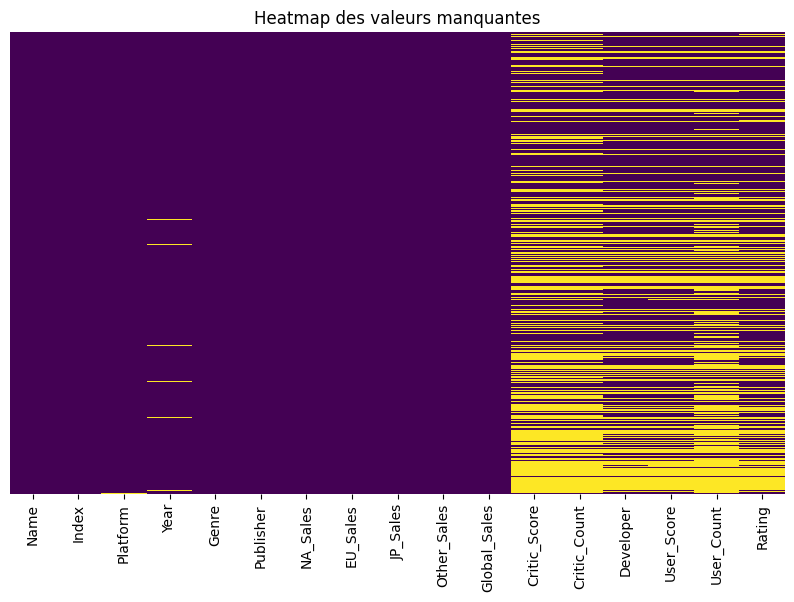

In [7]:
import seaborn as sns

# Graphique Seaborn pour créer une heatmap des valeurs manquantes

plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap des valeurs manquantes')
plt.show()

## Remplacement des valeurs manquantes dans "Year"

In [10]:
# Dictionnaire des années manquantes de chaque jeu

years_dict = {
    'LEGO Harry Potter: Years 5-7': 2011,
    'Test Drive Unlimited 2': 2011,
    'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005,
    'NBA Live 2003': 2002,
    'Bejeweled 3': 2010,
    'Singularity': 2010,
    'All-Star Baseball 2005': 2004,
    'Star Wars Jedi Knight II: Jedi Outcast' : 2002,
    'Slot Machine': 1979,
    'Shrek the Third': 2007,
    'The Dukes of Hazzard II: Daisy Dukes It Out': 2005,
    'Disgaea 3: Absence of Detention': 2012,
    'Harvest Moon: The Tale of Two Towns': 2010,
    'Nicktoons: Battle for Volcano Island': 2006,
    'Haven: Call of the King': 2002,
    'Unreal Championship 2: The Liandri Conflict': 2005,
    'Pac-Man Fever': 2002,
    'The Legend of Zelda: The Minish Cap': 2004,
    'Indy 500': 1977,
    'Gun': 2005,
    'Flag Capture': 1978,
    'Rock Revolution': 2008,
    'Jonah Lomu Rugby Challenge': 2011,
    'College Hoops 2K6': 2005,
    'Mega Man X Collection': 2006,
    'BioShock 2': 2010,
    'Danganronpa: Trigger Happy Havoc': 2014,
    'DanceDanceRevolution II': 2011,
    "Tony Hawk's Downhill Jam": 2006,
    'Big Beach Sports 2': 2008,
    'Jet X20': 2002,
    'Tribes: Aerial Assault': 2002,
    'Move Fitness': 2013,
    'Yu Yu Hakusho: Dark Tournament': 2004,
    'Ghostbusters II': 1992,
    'Breakaway IV': 1978,
    'Robotech: Battlecry': 2002,
    'Valkyria Chronicles III: Unrecorded Chronicles': 2011,
    'WRC: FIA World Rally Championship': 2011,
    'Famista 64': 1997,
    'Dead Space 3': 2013,
    'Pet Zombies': 2011,
    'Star Trek: Legacy': 2006,
    'Trauma Team': 2010,
    'Backbreaker': 2010,
    'Twisted Metal: Small Brawl': 2001,
    'Otomedius Excellent': 2011,
    'NBA Starting Five': 2002,
    'Teen Titans': 2005,
    "James Cameron's Dark Angel": 2002,
    'Sword of the Samurai': 1989,
    'Splatterhouse': 2010,
    'Alone in the Dark: The New Nightmare': 2001,
    'Vegas Party': 2009,
    'Jurassic Park: The Game': 2011,
    'Home Run': 1978,
    'eJay Clubworld': 2003,
    'Our House Party!': 2009,
    'WCW Backstage Assault': 2000,
    "Disney's Cinderella: Magical Dreams": 2005,
    'Transworld Surf': 2001,
    'Street Fighter IV': 2009,
    'Nintendo Puzzle Collection': 2003,
    'Charm Girls Club: My Fashion Mall': 2009,
    'Record of Agarest War Zero': 2011,
    'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': 2012,
    'Saru! Get You! Million Monkeys': 2006,
    'Street Hoops': 2002,
    'Godzilla: Destroy All Monsters Melee': 2002,
    'The Daring Game for Girls': 2010,
    'Rocksmith': 2011,
    'Major League Baseball 2K6': 2006,
    'Happy Feet Two': 2011,
    'Star Trek: Conquest': 2007,
    'GiFTPiA': 2003,
    "Disney's Chicken Little: Ace In Action": 2006,
    'Atsumare! Power Pro Kun no DS Koushien': 2006,
    'My Healthy Cooking Coach': 2009,
    'Luminous Arc 2 (JP sales)': 2008,
    'Egg Monster Hero': 2005,
    'Samurai Shodown Anthology': 2009,
    'Demon Chaos': 2005,
    'Action Man-Operation Extreme': 2000,
    'Super Puzzle Fighter II': 1996,
    'Charm Girls Club: My Fashion Show': 2009,
    'Get Fit with Mel B': 2010,
    'Face Racers: Photo Finish': 2011,
    'Zero: Tsukihami no Kamen': 2008,
    'The Hidden': 2007,
    'Dead Island: Riptide': 2013,
    'Mega Man Battle Network: Operation Shooting Star': 2009,
    'Smashing Drive': 2002,
    'Dream Trigger 3D': 2011,
    'Tornado': 2008,
    "McFarlane's Evil Prophecy": 2004,
    'Drake of the 99 Dragons': 2003,
    'Port Royale 3': 2012,
    'Build-A-Bear Workshop: Friendship Valley': 2010,
    'Alex Rider: Stormbreaker': 2006,
    'Yoostar on MTV': 2011,
    'Rayman Arena': 2002,
    'National Geographic Challenge!': 2011,
    'Jewel Link Chronicles: Mountains of Madness': 2012,
    'Chou Soujuu Mecha MG': 2006,
    'Prinny: Can I Really Be The Hero? (US sales)': 2008,
    'Combat Elite: WWII Paratroopers': 2005,
    'Captain America: Super Soldier': 2011,
    "Flip's Twisted World": 2010,
    'Mobile Ops: The One Year War': 2008,
    "Tom Clancy's Rainbow Six: Critical Hour": 2006,
    'GRID': 2008,
    'Reader Rabbit 2nd Grade': 2010,
    'Mountain Bike Adrenaline': 2007,
    'Tour de France 2011': 2011,
    'Drill Dozer': 2006,
    'Battle vs. Chess': 2012,
    'The History Channel: Great Battles - Medieval': 2010,
    'Monster Hunter Frontier Online': 2007,
    'RollerCoaster Tycoon': 1999,
    'B.L.U.E.: Legend of Water': 1998,
    "Luxor: Pharaoh's Challenge": 2007,
    'NHL Hitz Pro': 2003,
    'Sega Rally 2006': 2006,
    'World of Tanks': 2014,
    'Swords': 2010,
    'Half-Minute Hero 2': 2011,
    'Clockwork Empires': 2016,
    'Housekeeping': 2006,
    'Major League Baseball 2K8': 2008,
    'Sabre Wulf': 2004,
    'Beyond the Labyrinth': 2012,
    'Bikkuriman Daijiten': 2007,
    'Majesty 2: The Fantasy Kingdom Sim': 2009,
    'Fullmetal Alchemist: Brotherhood': 2009,
    'Samurai Spirits: Tenkaichi Kenkakuden': 2005,
    'Tom and Jerry in War of the Whiskers': 2002,
    'Super Duper Sumos': 2003,
    'Legacy of Ys: Books I & II': 2009,
    'The King of Fighters: Maximum Impact - Maniax': 2005,
    'Combat Wings: The Great Battles of WWII': 2012,
    'Tube Slider': 2003,
    'Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku': 2011,
    'Wii de Asobu: Metroid Prime': 2009,
    'Payout Poker & Casino': 2006,
    'Saint': 2009,
    'Steal Princess': 2009,
    'Mario Tennis': 2000,
    'Runaway: A Twist of Fate': 2011,
    "Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales)": 2009,
    "Cabela's Alaskan Adventure": 2006,
    'Writing and Speaking Beautiful Japanese DS': 2008,
    'Virtua Quest': 2005,
    "Shonen Jump's Yu-Gi-Oh! GX Card Almanac": 2007,
    'Without Warning': 2005,
    'Football Manager 2007': 2006,
    'Ferrari: The Race Experience': 2011,
    'PDC World Championship Darts 2008': 2009,
    'Dinotopia: The Sunstone Odyssey': 2003,
    "Dance! It's Your Stage": 2010,
    'Jet Impulse': 2007,
    'Dream Dancer': 2009,
    'Aquaman: Battle for Atlantis': 2003,
    'Homeworld Remastered Collection': 2015,
    'Shorts': 2009,
    'AKB1/48: Idol to Guam de Koishitara...': 2011,
    'Agarest Senki: Re-appearance': 2010,
    'Freaky Flyers': 2003,
    'Inversion': 2012,
    'Hakuouki: Shinsengumi Kitan': 2008,
    'The Smurfs': 2015,
    'The Legend of Zelda: The Minish Cap(weekly JP sales)': 2005,
    'Brothers in Arms: Furious 4': 2014,

    # Ajoutez d'autres jeux ici...
}

# Fonction pour remplir les années manquantes automatiquement

def fill_year(row):
    if pd.isna(row['Year']):
        return years_dict.get(row['Name'], row['Year'])
    return row['Year']

# Application du remplissage

df['Year'] = df.apply(fill_year, axis=1)

# Vérification les premières lignes du DataFrame après remplissage

# print(df.head(10))

In [11]:
# Identifier les valeurs manquantes dans la colonne Year

valeurs_manquantes = df[df["Year"].isna()]
colonne = "Year"

# Boucle pour afficher les lignes contenant des valeurs manquantes

for index, row in valeurs_manquantes.iterrows():
    print(f"Index: {index}, Ligne complète: \n{row}\n")

In [12]:
df.isna().sum()

,0
Name,0
Index,0
Platform,48
Year,0
Genre,0
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [13]:
df.head(20)

,Name,Index,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,Developer,User_Score,User_Count,Rating
0,Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,76.0,51.0,Nintendo,8,322.0,E
1,Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,Nintendo,8.3,138.0,E
2,Super Mario Bros.,2,GB,1999.0,Platform,Nintendo,3.40,1.30,0.15,0.22,5.07,NaN,NaN,Nintendo,8.3,138.0,E
3,Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,82.0,73.0,Nintendo,8.3,709.0,E
4,Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,80.0,73.0,Nintendo,8,192.0,E
5,Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
6,Tetris,6,NES,1988.0,Puzzle,Nintendo,2.97,0.69,1.81,0.11,5.58,NaN,NaN,NaN,NaN,NaN,NaN
7,Tetris,6,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
8,New Super Mario Bros.,7,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01,89.0,65.0,Nintendo,8.5,431.0,E
9,Wii Play,8,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02,58.0,41.0,Nintendo,6.6,129.0,E


## Remplacement des valeurs manquantes dans "User" et "Critic"

In [14]:
# Remplacement les valeurs "tbd" par NaN dans la colonne User_Score

df['User_Score'].replace('tbd', np.nan, inplace=True)
df['User_Score'].replace('NaN', np.nan, inplace=True)

# Conversion des colonnes nécessaires en numérique

df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')  # 'coerce' pour transformer les non-convertibles en NaN
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')
df['User_Count'] = pd.to_numeric(df['User_Count'], errors='coerce')
df['Critic_Count'] = pd.to_numeric(df['Critic_Count'], errors='coerce')

# Calcul de la moyenne en ignorant les NaN

#mean_user_score = df['User_Score'].mean(skipna=True)
#mean_critic_score = df['Critic_Score'].mean(skipna=True)
#mean_user_count = df['User_Count'].mean(skipna=True)
#mean_critic_count = df['Critic_Count'].mean(skipna=True)

#print("La moyenne du Score Utilisateur est de ", mean_user_score)
#print("La moyenne du Score Critique est de ",mean_critic_score)
#print("La moyenne du Nombre d'avis Utilisateurs est de ",mean_user_count)
#print("La moyenne du Nombre d'avis des Critiques est de ",mean_critic_count)

<ipython-input-14-00a5a1ca6de8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Score'].replace('tbd', np.nan, inplace=True)
<ipython-input-14-00a5a1ca6de8>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [15]:
df["User_Score"].value_counts()

,count
User_Score,
8.2,351
7.8,332
8.0,323
8.5,322
8.3,315
...,...
9.7,1
0.7,1
0.2,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16730 non-null  object 
 1   Index         16730 non-null  int64  
 2   Platform      16682 non-null  object 
 3   Year          16730 non-null  float64
 4   Genre         16730 non-null  object 
 5   Publisher     16676 non-null  object 
 6   NA_Sales      16730 non-null  float64
 7   EU_Sales      16730 non-null  float64
 8   JP_Sales      16730 non-null  float64
 9   Other_Sales   16730 non-null  float64
 10  Global_Sales  16730 non-null  float64
 11  Critic_Score  8448 non-null   float64
 12  Critic_Count  8448 non-null   float64
 13  Developer     10825 non-null  object 
 14  User_Score    8553 non-null   float64
 15  User_Count    8729 non-null   float64
 16  Rating        10688 non-null  object 
dtypes: float64(10), int64(1), object(6)
memory usage: 2.2+ MB


In [18]:
# Remplacement des valeurs manquantes par la moyenne respective

#df['User_Score'].fillna(mean_user_score, inplace=True)
#df['Critic_Score'].fillna(mean_critic_score, inplace=True)
#df['User_Count'].fillna(mean_user_count, inplace=True)
#df['Critic_Count'].fillna(mean_critic_count, inplace=True)

# Vérification

print(df.isna().sum())

Name               0
Index              0
Platform          48
Year               0
Genre              0
Publisher         54
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score    8282
Critic_Count    8282
Developer       5905
User_Score      8177
User_Count      8001
Rating          6042
dtype: int64


## Test moyenne par "Genre" pour "User" et "Critic"

In [20]:
# Calculer la moyenne des notes et du nombre d'avis pour chaque genre

genre_mean_userscore = df.groupby('Genre')['User_Score'].mean()

print(genre_mean_userscore.head(15))

genre_mean_usercount = df.groupby('Genre')['User_Count'].mean()

print(genre_mean_usercount.head(15))

genre_mean_criticscore = df.groupby('Genre')['Critic_Score'].mean()

print(genre_mean_criticscore.head(15))

genre_mean_criticcount = df.groupby('Genre')['Critic_Count'].mean()

print(genre_mean_criticcount.head(15))

# Remplacer les valeurs manquantes par la moyenne des notes du genre correspondant

df['User_Score'] = df.apply(lambda row: genre_mean_userscore[row['Genre']] if pd.isnull(row['User_Score']) else row['User_Score'], axis=1)
df['User_Count'] = df.apply(lambda row: genre_mean_usercount[row['Genre']] if pd.isnull(row['User_Count']) else row['User_Count'], axis=1)
df['Critic_Score'] = df.apply(lambda row: genre_mean_criticscore[row['Genre']] if pd.isnull(row['Critic_Score']) else row['Critic_Score'], axis=1)
df['Critic_Count'] = df.apply(lambda row: genre_mean_criticcount[row['Genre']] if pd.isnull(row['Critic_Count']) else row['Critic_Count'], axis=1)

# Afficher les premières lignes du DataFrame pour vérifier le remplissage

print("\nAperçu du DataFrame après remplissage des valeurs manquantes:")
print(df.head())

Genre
Action          7.178607
Adventure       7.262722
Fighting        7.309091
Misc            6.986804
Platform        7.444359
Puzzle          7.201987
Racing          7.189515
Role-Playing    7.653837
Shooter         7.166465
Simulation      7.206522
Sports          7.132806
Strategy        7.219658
Name: User_Score, dtype: float64
Genre
Action          234.625913
Adventure       117.734104
Fighting         82.225806
Misc             48.438735
Platform        120.752688
Puzzle           39.791411
Racing           70.807692
Role-Playing    385.848414
Shooter         386.557884
Simulation      106.970509
Sports           71.453333
Strategy        200.540616
Name: User_Count, dtype: float64
Genre
Action          67.737456
Adventure       65.978528
Fighting        70.027273
Misc            66.656126
Platform        68.190574
Puzzle          67.317391
Racing          68.853282
Role-Playing    72.992157
Shooter         70.758799
Simulation      68.991453
Sports          73.283019
Strate

In [22]:
print(df["User_Score"].value_counts())
print("------------------------")
print(df.info())
print("------------------------")
print(df.isna().sum())

User_Score
7.178607    1342
6.986804    1268
7.132806    1099
7.262722     954
7.653837     647
            ... 
9.700000       1
0.700000       1
0.200000       1
1.200000       1
0.600000       1
Name: count, Length: 107, dtype: int64
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16730 non-null  object 
 1   Index         16730 non-null  int64  
 2   Platform      16682 non-null  object 
 3   Year          16730 non-null  float64
 4   Genre         16730 non-null  object 
 5   Publisher     16676 non-null  object 
 6   NA_Sales      16730 non-null  float64
 7   EU_Sales      16730 non-null  float64
 8   JP_Sales      16730 non-null  float64
 9   Other_Sales   16730 non-null  float64
 10  Global_Sales  16730 non-null  float64
 11  Critic_Score  16730 non-null  float64
 12  Critic_Count  16730 no

## Remplacement des valeurs manquantes dans "Platform"

In [23]:
print(df["Name"] == "Watch Dogs 2")

0        False
1        False
2        False
3        False
4        False
         ...  
16725    False
16726    False
16727     True
16728    False
16729    False
Name: Name, Length: 16730, dtype: bool


In [25]:
# Identifier les valeurs manquantes dans la colonne Year

platform_manquantes = df[df["Platform"].isna()]
colonne_platform = "Platform"

# Boucle pour afficher les lignes contenant des valeurs manquantes

for index, row in platform_manquantes.iterrows():
    print(f"Index: {index}, Ligne complète: \n{row}\n")

# Problème : ces jeux sont sortis sur différentes plateformes en même temps

Index: 16682, Ligne complète: 
Name            Assassin's Creed The Ezio Collection
Index                                          16734
Platform                                         NaN
Year                                          2016.0
Genre                                         Action
Publisher                                    Ubisoft
NA_Sales                                        0.04
EU_Sales                                        0.13
JP_Sales                                         0.0
Other_Sales                                     0.03
Global_Sales                                     0.2
Critic_Score                                    72.0
Critic_Count                                    32.0
Developer                           Ubisoft Montreal
User_Score                                       7.4
User_Count                                      49.0
Rating                                             M
Name: 16682, dtype: object

Index: 16683, Ligne complète: 
Name     

In [26]:
# Remplacement des valeurs manquantes par les valeurs réelles trouvées sur VGChartz

df.at[16682, 'Platform'] = 'XOne',
df.at[16683, 'Platform'] = '3DS',
df.at[16684, 'Platform'] = 'PS4',
df.at[16685, 'Platform'] = 'XOne',
df.at[16686, 'Platform'] = 'PS4',
df.at[16687, 'Platform'] = 'PS4',
df.at[16688, 'Platform'] = 'PS4',
df.at[16689, 'Platform'] = 'PS4',
df.at[16690, 'Platform'] = 'PS4',
df.at[16691, 'Platform'] = 'PS4',
df.at[16692, 'Platform'] = 'PS4',
df.at[16693, 'Platform'] = 'XOne',
df.at[16694, 'Platform'] = 'PS4',
df.at[16695, 'Platform'] = 'PS4',
df.at[16696, 'Platform'] = 'PS4',
df.at[16697, 'Platform'] = 'PS4',
df.at[16698, 'Platform'] = 'WiiU',
df.at[16699, 'Platform'] = 'PC',
df.at[16700, 'Platform'] = 'XOne',
df.at[16701, 'Platform'] = 'PS4',
df.at[16702, 'Platform'] = 'PS4',
df.at[16703, 'Platform'] = 'PS4',
df.at[16704, 'Platform'] = 'PS4',
df.at[16705, 'Platform'] = 'PS4',
df.at[16706, 'Platform'] = '3DS',
df.at[16707, 'Platform'] = 'PS4',
df.at[16708, 'Platform'] = 'PS4',
df.at[16709, 'Platform'] = 'WiiU',
df.at[16710, 'Platform'] = 'PS4',
df.at[16711, 'Platform'] = 'XOne',
df.at[16712, 'Platform'] = 'XOne',
df.at[16713, 'Platform'] = 'PS4',
df.at[16714, 'Platform'] = 'PS4',
df.at[16715, 'Platform'] = 'PSV',
df.at[16716, 'Platform'] = 'PC',
df.at[16717, 'Platform'] = 'PC',
df.at[16718, 'Platform'] = 'WiiU',
df.at[16719, 'Platform'] = 'PSV',
df.at[16720, 'Platform'] = 'PC',
df.at[16721, 'Platform'] = 'PS4',
df.at[16722, 'Platform'] = 'PS4',
df.at[16723, 'Platform'] = 'PC',
df.at[16724, 'Platform'] = 'PS4',
df.at[16725, 'Platform'] = 'PC',
df.at[16726, 'Platform'] = 'PS4',
df.at[16727, 'Platform'] = 'PS4',
df.at[16728, 'Platform'] = 'PS4',
df.at[16729, 'Platform'] = 'PS4',

In [27]:
df.isna().sum()

,0
Name,0
Index,0
Platform,0
Year,0
Genre,0
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Valeurs manquantes dans "Publisher"

In [29]:
# Dictionnaire des "Publisher" manquants de chaque jeu

publisher_dict = {
    'Triple Play 99': "Electronic Arts",
    'Shrek / Shrek 2 2-in-1 Gameboy Advance Video': "Majesco",
    "Bentley's Hackpack": "Sony Computer Entertainment",
    'Nicktoons Collection: Game Boy Advance Video Volume 1': "Majesco",
    'SpongeBob SquarePants: Game Boy Advance Video Volume 1': "Majesco",
    'SpongeBob SquarePants: Game Boy Advance Video Volume 2': "Majesco",
    'The Fairly Odd Parents: Game Boy Advance Video Volume 1': "Majesco",
    'The Fairly Odd Parents: Game Boy Advance Video Volume 2': "Majesco",
    'Cartoon Network Collection: Game Boy Advance Video Platinum Edition': "Majesco",
    'The Legend of Zelda: The Minish Cap(weekly JP sales)': "Nintendo",
    'Sonic X: Game Boy Advance Video Volume 1': "Majesco",
    'Dora the Explorer: Game Boy Advance Video Volume 1': "Majesco",
    'Cartoon Network Collection: Game Boy Advance Video Volume 1': "Majesco",
    'All Grown Up!: Game Boy Advance Video Volume 1': "Majesco",
    'Nicktoons Collection: Game Boy Advance Video Volume 2': "Majesco",
    'Yu Yu Hakusho: Dark Tournament': "Atari",
    'SpongeBob SquarePants: Game Boy Advance Video Volume 3': "Majesco",
    'Thomas the Tank Engine & Friends': "THQ",
    'Dragon Ball GT: Game Boy Advance Video Volume 1': "Majesco",
    'Codename: Kids Next Door: Game Boy Advance Video Volume 1': "Majesco",
    'Teenage Mutant Ninja Turtles: Game Boy Advance Video Volume 1': "Majesco",
    'Stronghold 3': "SouthPeak Interactive",
    'Cartoon Network Collection: Game Boy Advance Video Special Edition': "Majesco",
    'Pokémon: Johto Photo Finish: Game Boy Advance Video': "Majesco",
    'Strawberry Shortcake: Game Boy Advance Video Volume 1': "Majesco",
    'Farming Simulator 2011': "Focus Home Interactive",
    'Super Robot Wars OG Saga: Masou Kishin II - Revelation of Evil God': "Namco Bandai Games",
    'Disney Channel Collection Vol. 1': "Majesco",
    'Cartoon Network Collection: Game Boy Advance Video Volume 2': "Majesco",
    'Silverlicious': "GameMill",
    'UK Truck Simulator': "Excalibur Publishing",
    'Xia-Xia': "GameMill",
    'Nicktoons Collection: Game Boy Advance Video Volume 3': "Majesco",
    'Demolition Company: Gold Edition': "Giants Software",
    'Moshi, Kono Sekai ni Kami-sama ga Iru to suru Naraba.': "Rejet",
    'Super Robot Monkey Team: Game Boy Advance Video Volume 1': "Majesco",
    'Dance with Devils': "Rejet",
    "Legends of Oz: Dorothy's Return": "GameMill",
    'Driving Simulator 2011': "Excalibur Publishing",
    "Atsumare! Power Pro Kun no DS Koushien": "Konami",
    "Action Man-Operation Extreme": "Hasnro Interactive",
    "Chou Soujuu Mecha MG": "Nintendo",
    "Prinny: Can I Really Be The Hero? (US sales)": "NIS America",
    "Monster Hunter Frontier Online": "Capcom",
    "B.L.U.E.: Legend of Water": "Hudson Soft",
    "World of Tanks": "Wargaming.net",
    "Housekeeping": "IE Institute",
    "Bikkuriman Daijiten": "3 O'Clock",
    "Umineko no Naku Koro ni San: Shinjitsu to Gensou no Yasoukyoku": "Alchemist",
    "Mario Tennis": "Nintendo",
    "Dream Dancer": "Zoo Games",
    "Homeworld Remastered Collection": "Gearbox Software",
    "AKB1/48: Idol to Guam de Koishitara...": "Namco Bandai Games",
    "Brothers in Arms: Furious 4": "Ubisoft"



}
# Fonction pour remplir les "Publisher" manquantes automatiquement

def fill_publisher(row):
    if pd.isna(row['Publisher']):
        return publisher_dict.get(row['Name'], row['Publisher'])
    return row['Publisher']

# Application du remplissage

df['Publisher'] = df.apply(fill_publisher, axis=1)

# Vérification les premières lignes du DataFrame après remplissage

In [30]:
df.iloc[16392]["Name"]

'AKB1/48: Idol to Guam de Koishitara...'

In [31]:
# Identifier les valeurs manquantes dans la colonne Publisher

publisher_manquantes = df[df["Publisher"].isna()]
colonne_publisher = "Publisher"

# Boucle pour afficher les lignes contenant des valeurs manquantes

for index, row in publisher_manquantes.iterrows():
    print(f"Index: {index}, Ligne complète: \n{row}\n")

In [32]:
df.isna().sum()

,0
Name,0
Index,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


# Data Viz' avec Plotly

In [34]:
# Import des packages Plotly

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

In [35]:
# Distribution des Ventes Globales par Genre

fig = px.bar(x = "Genre", y = "Global_Sales", title = "Distribution des Ventes Globales par Genre", data_frame = df,
             color = "Genre")
fig.show()

In [36]:
# Trier le DataFrame par ventes globales
sorted_globalsales = df.sort_values(by='Global_Sales')

fig = px.bar(sorted_globalsales, x='Platform', y='Global_Sales', color='Platform',
             title='Comparaison des Ventes Globales entre Plateformes',
             labels={'Global_Sales': 'Ventes Globales (en millions)', 'Platform': 'Plateforme'})
fig.show()

In [37]:
# Tri du DataFrame par Année

sorted_year = df.sort_values(by='Year')

# Distribution des Genres par Année

fig = px.histogram(sorted_year, x='Year', color='Genre', barmode='group',
                   title='Distribution des Genres par Année',
                   labels={'Year': 'Année', 'count': 'Nombre de Jeux'})
fig.show()

In [38]:
# Distribution des Scores de Critiques

fig = px.histogram(df, x='Critic_Score', nbins=20,
                   title='Distribution des Scores de Critiques',
                   labels={'Critic_Score': 'Score Critiques'})
fig.show()

# Distribution des Scores d'Utilisateurs

fig = px.histogram(df, x='User_Score', nbins=20,
                   title="Distribution des Scores d'Utilisateurs",
                   labels={'User_Score': 'Score Utilisateurs'})
fig.show()

In [39]:
# Tri du DataFrame par Score Utilisateur

sorted_userscore = df.sort_values(by='User_Score')

# Distribution des Scores des Utilisateurs par Genre

fig = px.scatter(sorted_userscore, x='User_Score', y='Critic_Score',
                 color='Genre',
                 title='Scores des Utilisateurs et des Critiques',
                 labels={'User_Score': 'Score Utilisateur', 'Critic_Score': 'Score Critique'})
fig.show()

# Problème à régler sur les valeurs "tbd"
# Tentative de régler ça plus haut dans nettoyage User et Crtic mais sans succès

In [40]:
# Tri du DataFrame par Année

sorted_year = df.sort_values(by='Year')

# Evolution des Ventes Globales au fil des Années

fig = px.bar(sorted_year, x='Year', y='Global_Sales',
              title='Évolution des Ventes Globales au Fil des Années',
              labels={'Year': 'Année', 'Global_Sales': 'Ventes Globales (en millions)'})
fig.show()

In [41]:
# Score des Utilisateurs et des Critiques par Genre

fig = px.scatter(df, x='User_Score', y='Critic_Score',
                 size='User_Count', color='Genre',
                 title='Scores des Utilisateurs et des Critiques par Genre',
                 labels={'User_Score': 'Score Utilisateur', 'Critic_Score': 'Score Critique'})
fig.show()

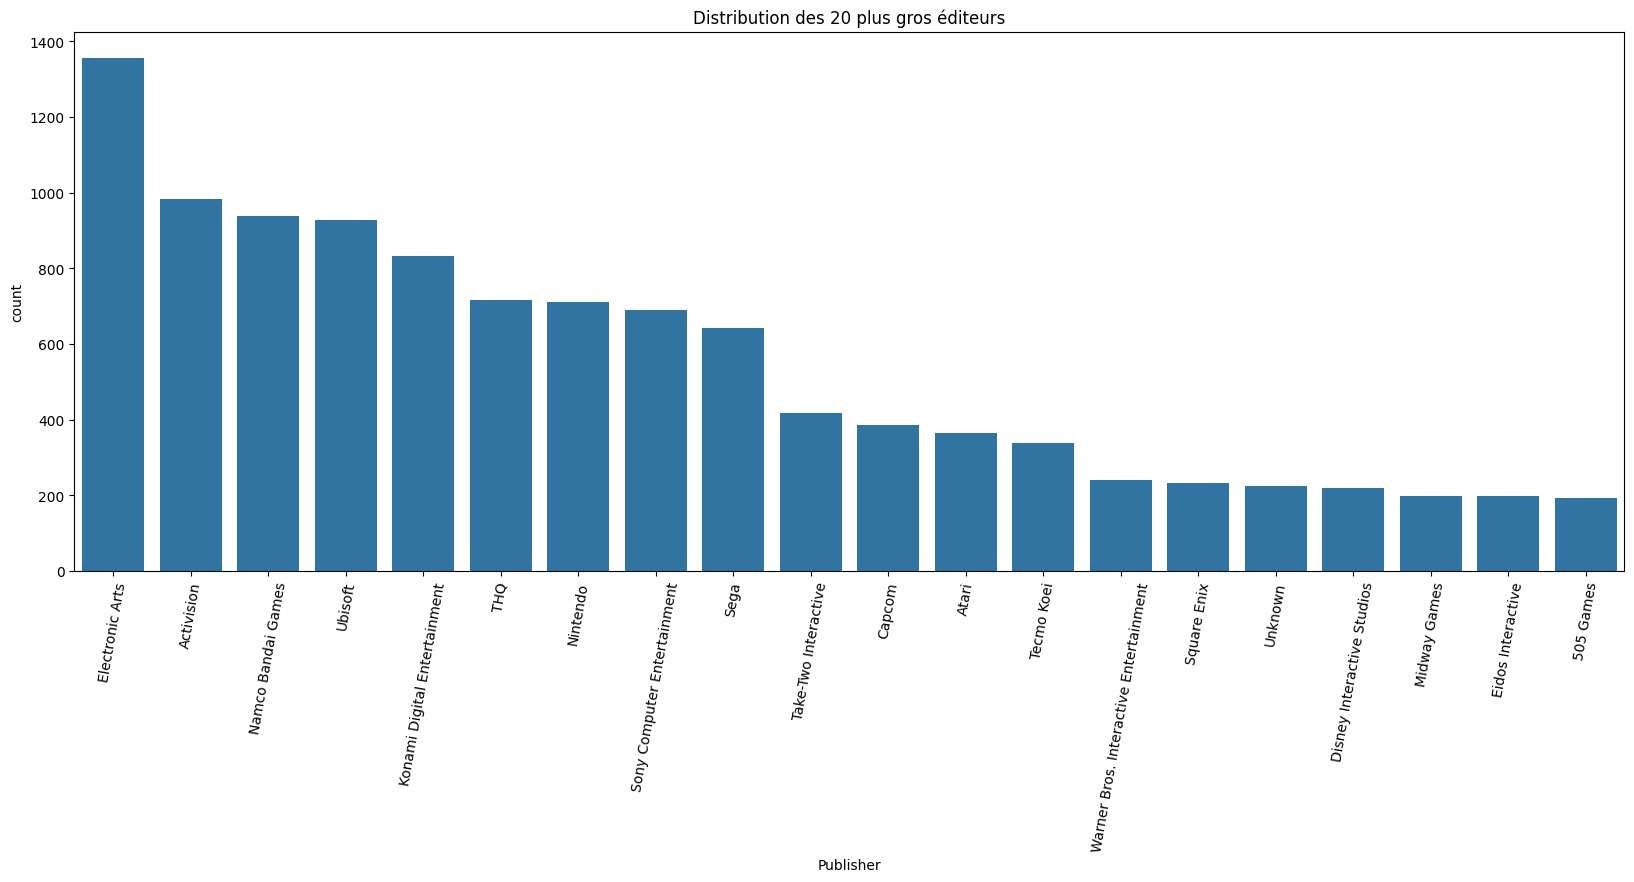

In [42]:
# Compter le nombre de jeux par éditeur
publisher_counts = df['Publisher'].value_counts()

# Sélectionner les 10 éditeurs avec le plus grand nombre de jeux
top_20_publishers = publisher_counts.nlargest(20).index

# Filtrer le DataFrame pour ne garder que les 10 plus gros éditeurs
df_top_20_publishers = df[df['Publisher'].isin(top_20_publishers)]

# Tracer le graphique
plt.figure(figsize=(20, 7))

sns.countplot(x='Publisher', data=df_top_20_publishers, order=top_20_publishers)
plt.title('Distribution des 20 plus gros éditeurs')
plt.xticks(rotation=80)
plt.show()

Meilleures ventes par éditeur :
Publisher
Nintendo                       1789.30
Electronic Arts                1117.94
Activision                      733.52
Sony Computer Entertainment     609.30
Ubisoft                         476.37
                                ...   
UIG Entertainment                 0.01
New World Computing               0.01
Commseed                          0.01
Boost On                          0.01
Paradox Development               0.01
Name: Global_Sales, Length: 596, dtype: float64


<ipython-input-43-38dbb58ca4b1>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warnin

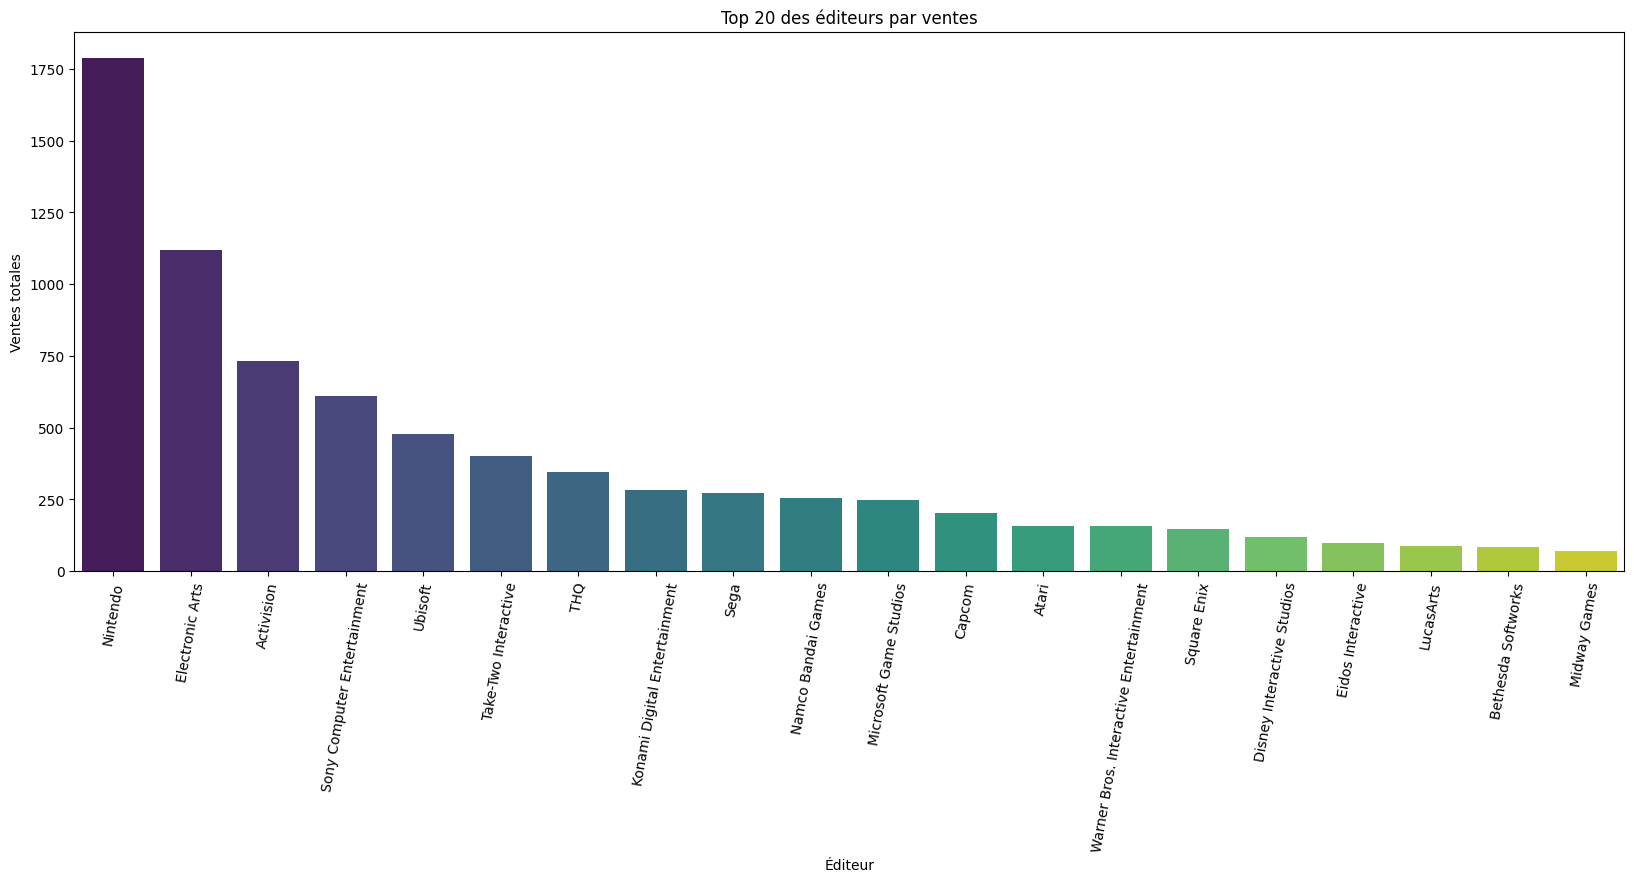

In [43]:
# Calculer les ventes totales par éditeur
ventes_par_editeur = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)

# Afficher les meilleures ventes par éditeur
print("Meilleures ventes par éditeur :")
print(ventes_par_editeur)

# Sélectionner les top 10 éditeurs (ou tout autre nombre)
top_editeurs = ventes_par_editeur.head(20)

# Tracer le graphique
plt.figure(figsize=(20, 7))
sns.barplot(x=top_editeurs.index, y=top_editeurs.values, palette='viridis')
plt.title('Top 20 des éditeurs par ventes')
plt.xlabel('Éditeur')
plt.ylabel('Ventes totales')
plt.xticks(rotation=80)
plt.show()

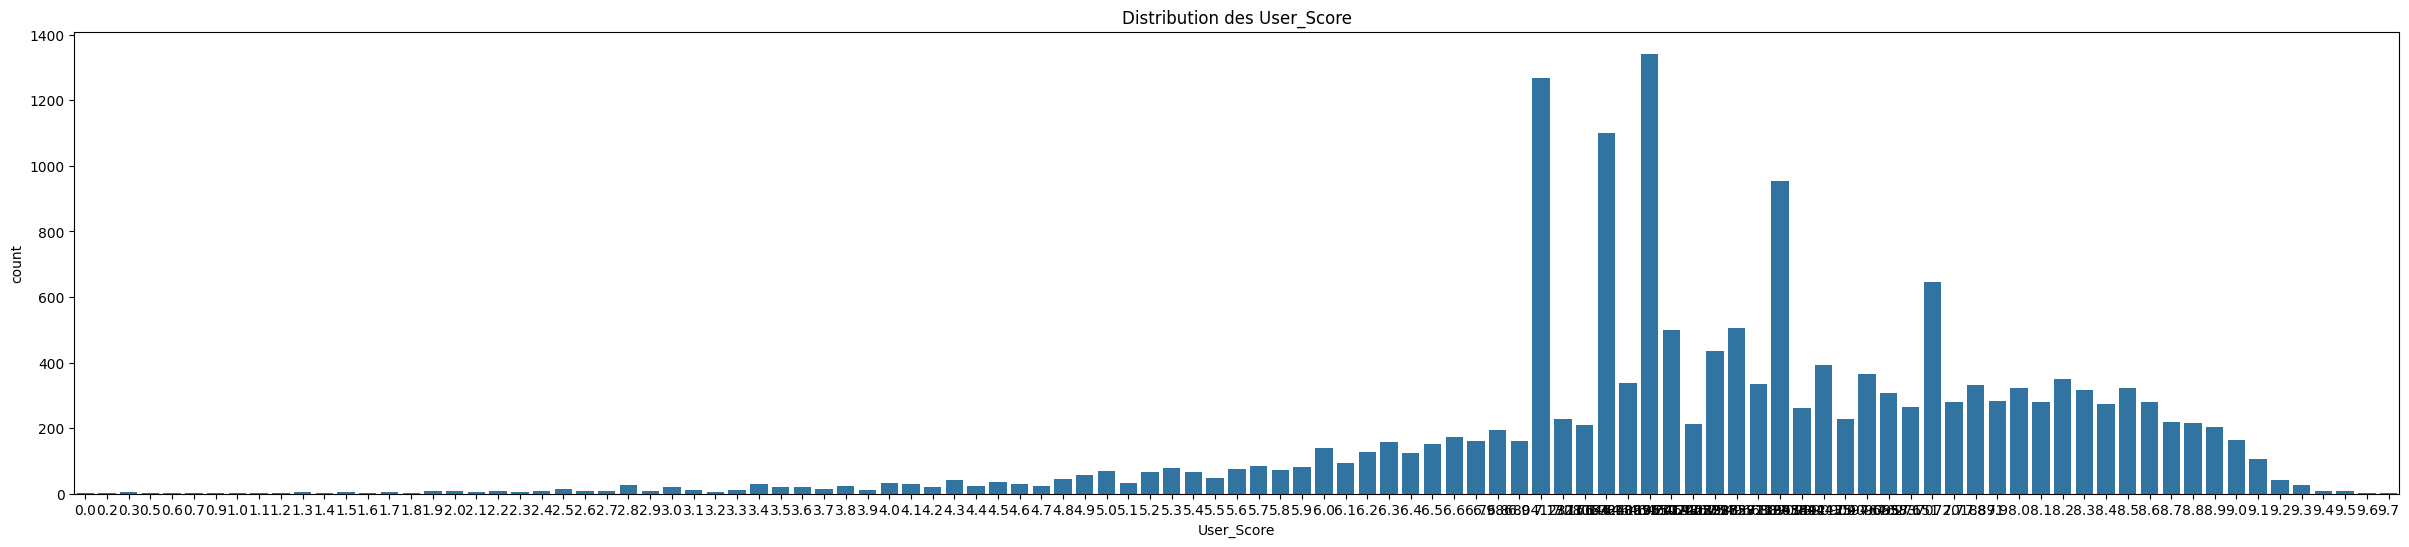

In [ ]:
plt.figure(figsize=(30, 6))

sns.countplot(x='User_Score', data=df)
plt.title('Distribution des User_Score')
plt.show()

In [ ]:
# Téléchargement du dfinal

# from google.colab import files
# df.to_csv('dfinal2.csv')
# files.download('dfinal2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>